In [1]:
import pandas as pd
import os
import pandas_datareader.data as web
import pandas_datareader as pdr
import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)
from datetime import datetime
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') 
import yfinance as yf


/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
symbola = pd.read_csv("large_cap_volume_leaders.csv").Symbol
symbolb = pd.read_csv("nasdaq_volume_leaders.csv").Symbol
symbolc = pd.read_csv("mid_cap_volume_leaders.csv").Symbol
symbols = [i for i in set(symbola.append(symbolb).append(symbolc))]
print(len(symbols))

429


In [3]:
def revenue_spread(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    events = tickerData.calendar
    return (events.iloc[:,0]['Revenue High']-events.iloc[:,0]['Revenue Low'])/events.iloc[:,0]['Revenue Average']

In [4]:
def momentum_data(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    events = tickerData.calendar
    rev_spread = (events.iloc[:,0]['Revenue High']-events.iloc[:,0]['Revenue Low'])/events.iloc[:,0]['Revenue Average']
    df = tickerData.history(period='1d', start='2010-1-1', end='2020-7-7')
    df['SMA_50'] = df.iloc[:,1].rolling(window=50).mean()
    df['SMA_250'] = df.iloc[:,1].rolling(window=250).mean()
    xdf = df[df['SMA_250'] < df['SMA_50']]
    ydf = df[df['SMA_250'] > df['SMA_50']]
    under = pd.to_datetime(ydf.iloc[:,-1].index)[-1]
    cross = pd.to_datetime(xdf.iloc[:,-1].index)[-1]
    xdays = int(str(cross-under).split()[0])
    return pd.DataFrame({'stock': tickerSymbol, 'xdays': xdays, 'rev_spead': rev_spread}, index=[0])

In [5]:
momentum_data("AAPL")

,stock,xdays,rev_spead
0,AAPL,431,0.253036


In [11]:
def get_momentum_stats(symbols):
    mdf = pd.DataFrame()
    for ticker in symbols:
        try:
            temp = momentum_data(ticker)
            mdf = pd.concat([mdf.copy(), temp])
            #print(ticker)
        except:
            continue
    mdf.to_csv("momentum_stats.txt", sep="\t", index=False)
    return mdf.reset_index()

In [12]:
mdf = get_momentum_stats(symbols)

In [51]:
mdf[(mdf['xdays'] > 0) & (mdf['xdays'] < 25)].sort_values(['rev_spead'], ascending=False)

,index,stock,xdays,rev_spead
80,0,SGMO,24,3.373576
19,0,PENN,24,1.074046
190,0,UBER,4,0.624138
108,0,FND,18,0.347752
167,0,RAMP,4,0.188826
115,0,AMCR,6,0.139171
27,0,SFIX,4,0.117945
83,0,NVTA,4,0.098688
189,0,AVTR,21,0.086859
2,0,ORCL,5,0.033412


0.0


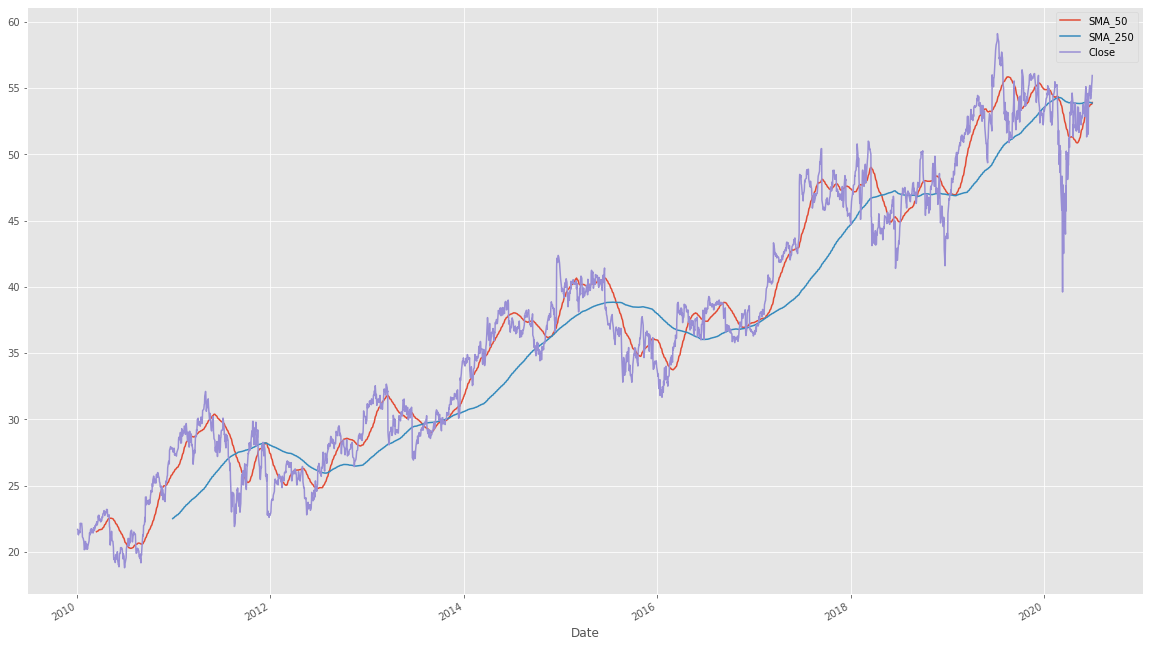

In [54]:
plot_smas("ORCL")

In [9]:
def plot_smas(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    df = tickerData.history(period='1d', start='2010-1-1', end='2020-7-6')
    df['SMA_50'] = df.iloc[:,1].rolling(window=50).mean()
    df['SMA_100'] = df.iloc[:,1].rolling(window=100).mean()
    df['SMA_150'] = df.iloc[:,1].rolling(window=150).mean()
    df['SMA_250'] = df.iloc[:,1].rolling(window=250).mean()
    print(df.tail(n=1)['SMA_250'][0]-df.tail(n=1)['SMA_250'][0])
    df[['SMA_50', 'SMA_250', 'Close']].plot(figsize=(20,12))

0.0


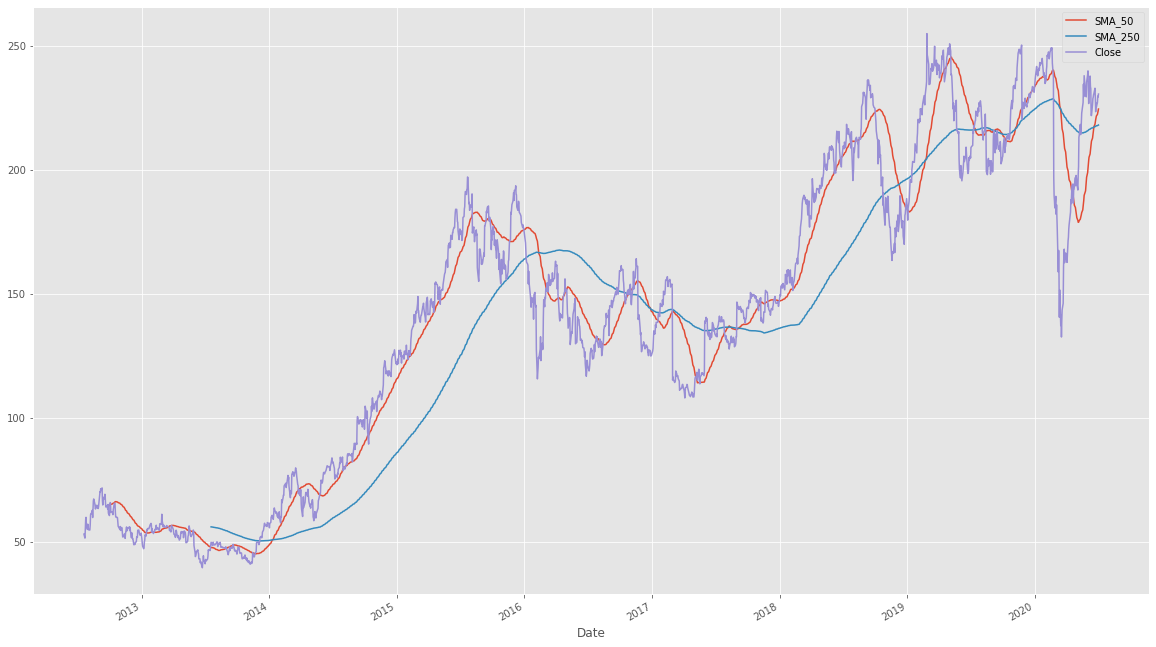

In [30]:
plot_smas("SGMO")

1.7233600000000324


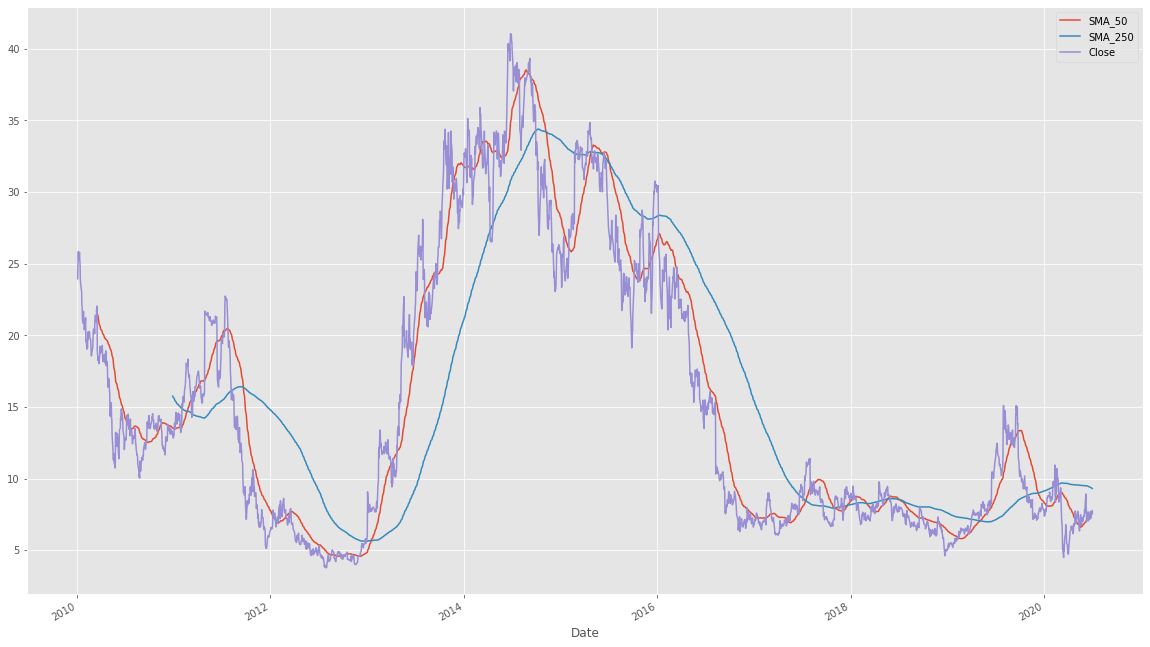

In [114]:
plot_smas("SPWR")

-37.59712000000036


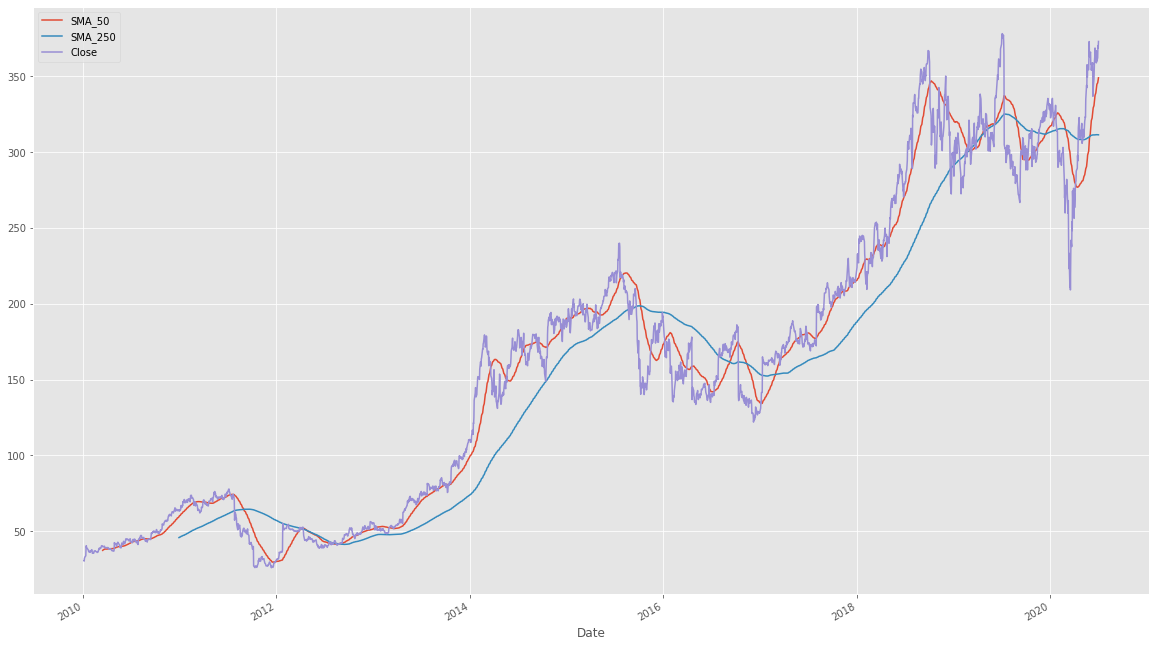

In [89]:
plot_smas("ILMN")

-2.112000000000016


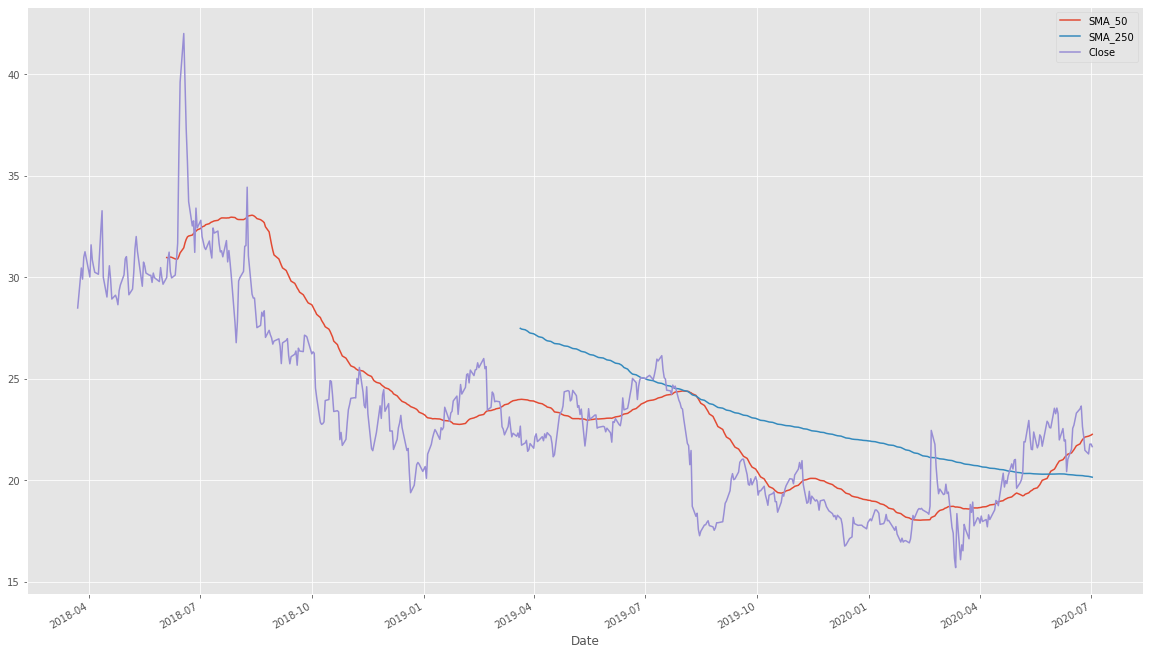

In [80]:
plot_smas("DBX")

In [212]:
#get data on this ticker
tickerData = yf.Ticker("TSLA")
events = tickerData.financials
events

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [202]:
infos = tickerData.info
infos

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Series([], Name: Dividends, dtype: int64)